# Download Data

In [1]:
!wget http://commachallenge.s3-us-west-2.amazonaws.com/speed_challenge_2017.tar
!tar -xvf /content/speed_challenge_2017.tar
!mkdir data/frames

--2019-03-16 13:01:37--  http://commachallenge.s3-us-west-2.amazonaws.com/speed_challenge_2017.tar
Resolving commachallenge.s3-us-west-2.amazonaws.com (commachallenge.s3-us-west-2.amazonaws.com)... 52.218.193.201
Connecting to commachallenge.s3-us-west-2.amazonaws.com (commachallenge.s3-us-west-2.amazonaws.com)|52.218.193.201|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 197191680 (188M) [application/x-tar]
Saving to: ‘speed_challenge_2017.tar’

speed_challenge_201 100%[===================>] 188.06M  22.1MB/s    in 9.6s    

2019-03-16 13:01:47 (19.6 MB/s) - ‘speed_challenge_2017.tar’ saved [197191680/197191680]

README
data/
data/train.mp4
data/test.mp4
data/train.txt


# Exploring Data

           0
0  28.105569
1  28.105569
2  28.106527
3  28.130404
4  28.109243
5  28.088572
6  28.034211
7  28.018491
8  27.986624
9  28.016352

Statistics of Speed Distribution
DescribeResult(nobs=20400, minmax=(array([0.]), array([28.130404])), mean=array([12.18318166]), variance=array([67.35095656]), skewness=array([0.17719878]), kurtosis=array([-1.36264429]))


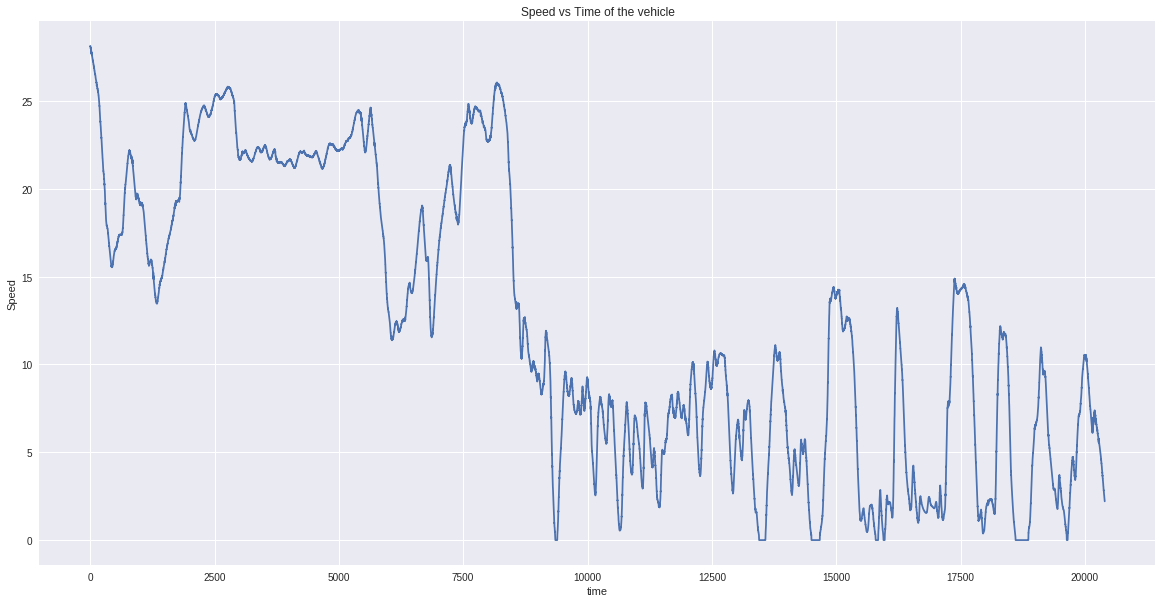


Histogram of speed distribution


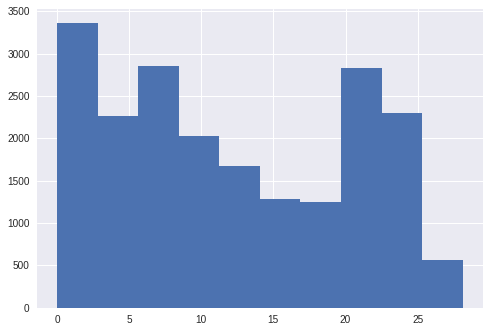

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy

data_df = pd.read_csv('/content/data/train.txt', header=None)
print(data_df.head(10))

speeds = data_df.values

print('\nStatistics of Speed Distribution')
print(scipy.stats.describe(speeds))

plt.figure(figsize=(20,10))
plt.title('Speed vs Time of the vehicle')
plt.plot(speeds)
plt.xlabel('time')
plt.ylabel('Speed')
plt.show()


print("\nHistogram of speed distribution")
plt.hist(speeds)
plt.show()

## Video frames to images

In [0]:
import cv2

vidcap = cv2.VideoCapture('/content/data/train.mp4')
success,image = vidcap.read()
count = 0
success = True
while success:
  cv2.imwrite("/content/data/frames/%d.jpg" % count, image)    
  success,image = vidcap.read()
  count += 1

In [4]:
import os 
frames_list = os.listdir('/content/data/frames')
len(frames_list)

20400

In [0]:
# utils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# get image index with path as input
def get_image_idx(path):
  idx = path.split('/')[4].split('.')[0]
  return int(idx)

# get speed from txt with idx
data_df = pd.read_csv('/content/data/train.txt', header=None)
def get_speed(idx):
  return data_df.iloc[idx][0]
  
def view_img_speed(img_path):
#   img_path = '/content/data/frames/'+frames_list[0]
  print(img_path)
  img = mpimg.imread(img_path)
  print(img.shape)
  plt.text(100,100,'speed = '+str(get_speed(get_image_idx(img_path))), fontsize=20, color='yellow')
  plt.imshow(img)
  plt.grid(False)
  plt.show()

/content/data/frames/200.jpg
(480, 640, 3)


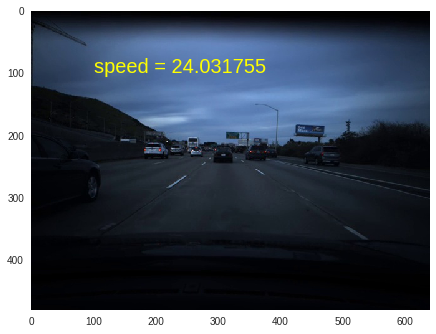

/content/data/frames/201.jpg
(480, 640, 3)


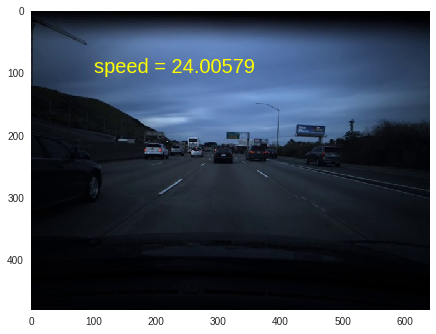

/content/data/frames/202.jpg
(480, 640, 3)


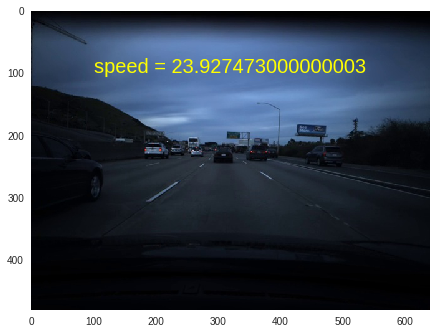

/content/data/frames/203.jpg
(480, 640, 3)


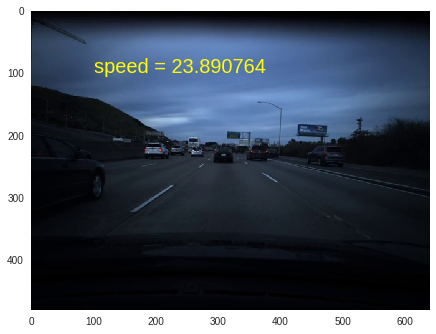

/content/data/frames/204.jpg
(480, 640, 3)


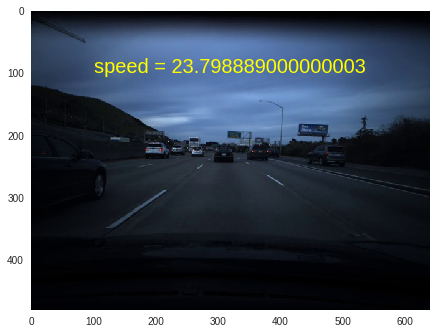

In [6]:
for i in range(200,205):
  img_path = '/content/data/frames/'+str(i)+'.jpg'
  view_img_speed(img_path)

# Raw Data to Numpy to Tensors

0 28.105569
/content/data/frames/0.jpg
(480, 640, 3)


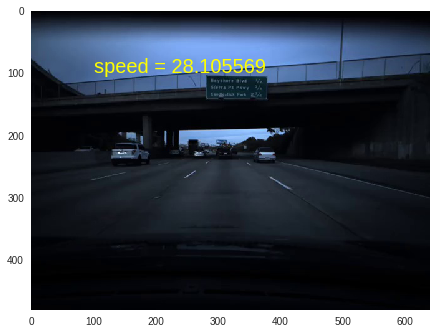

1 28.105569
/content/data/frames/1.jpg
(480, 640, 3)


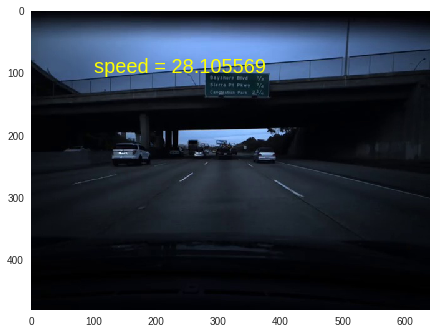

2 28.106527000000003
/content/data/frames/2.jpg
(480, 640, 3)


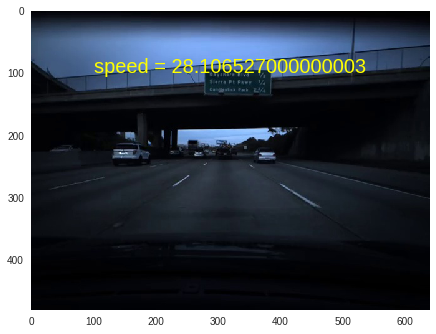

3 28.130404
/content/data/frames/3.jpg
(480, 640, 3)


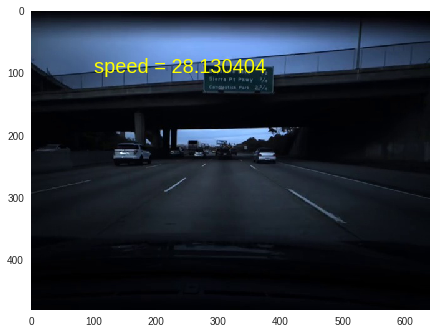

4 28.109243
/content/data/frames/4.jpg
(480, 640, 3)


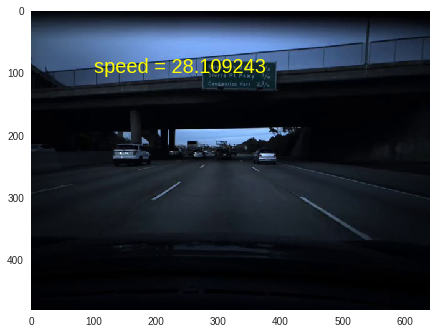

5 28.088571999999996
/content/data/frames/5.jpg
(480, 640, 3)


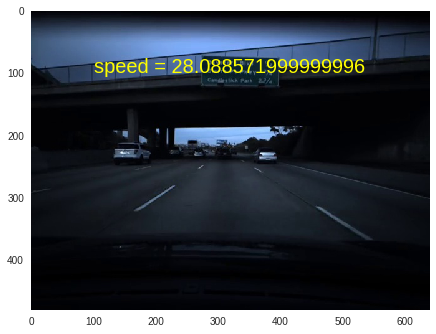

In [15]:
for i, row in data_df.iterrows():
  print(i, row[0])
  img_path = "/content/data/frames/{}.jpg".format(i)
  view_img_speed(img_path)
  if i>=5:break

In [0]:
for i, row in data_df.iterrows():
  img_path = "/content/data/frames/{}.jpg".format(i)
  

## 480 x 640 is computationally expensive(atleast for GPU i am using) and also the sky and road doesn't give much information regarding the speed.

The speed of the vehicle will be calculated by the relative distance of the vehicle form other, so its better to remove unnecessary data from the image.

I am cropping 220x220 from center which will contain most of the necessary data. Range can be increased for better performance but due to my GPU Memory , i will stick to 240x240 , will increase it if possible later.

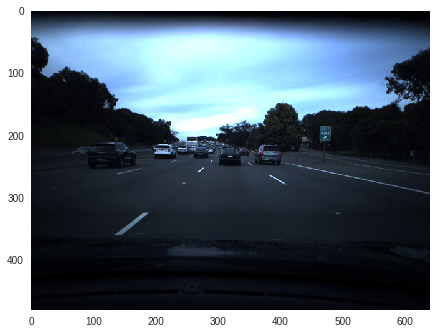

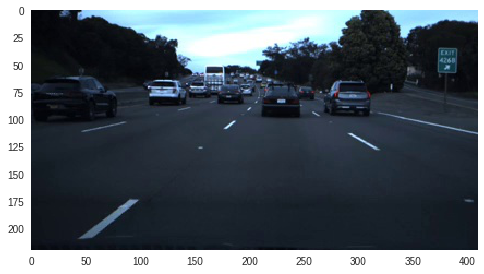

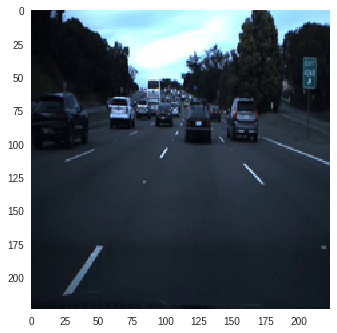

In [49]:
from PIL import Image

basewidth = 300
img = Image.open("/content/data/frames/1000.jpg")








img1 = img.crop((90,150,500,370))
# [130:350,210:450]
plt.imshow(img)
plt.grid(False)
plt.show()

plt.imshow(img1)
plt.grid(False)
plt.show()

import numpy as np
img2 = img1.resize((224,224), Image.ANTIALIAS)

plt.imshow(img2)
plt.grid(False)
plt.show()